In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/dataset_file.csv")
# data.head(10)

# data['fweatherdate'] = pd.to_datetime(data['fweatherdate'])
# data['fcasedate'] = pd.to_datetime(data['fcasedate'])
# data['fvaccinationdate'] = pd.to_datetime(data['fvaccinationdate'])

# data.head(10)

In [25]:
# grouped = data.groupby(["fweatherid","fweatherdate"])[["temperature","proportionfullyvaccinated", "ratechangecases"]].mean()
# grouped.head(20)
# grouped.to_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")

In [26]:
# Read grouped data
data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")
data['date'] = pd.to_datetime(data['date'])
# Encode nominal variable date (contains 26 distinct values)
data['date'] = data['date'].apply(lambda x: x.toordinal())

In [27]:
!pip install category_encoders
import category_encoders as ce

In [28]:
encoder = ce.OneHotEncoder(cols=['weatherid']) 

encoder

data = encoder.fit_transform(data)
data.head()

,weatherid_1,weatherid_2,weatherid_3,weatherid_4,weatherid_5,weatherid_6,weatherid_7,weatherid_8,weatherid_9,weatherid_10,...,weatherid_60,weatherid_61,weatherid_62,weatherid_63,weatherid_64,weatherid_65,date,temperature,proportionfullyvaccinated,ratechangecases
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737760,5.6,0.000,817.275
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737791,5.3,0.060,1136.350
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737822,4.1,0.825,1408.045
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737850,7.2,1.700,1687.380
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737881,10.9,1.700,2145.950


In [29]:
predictors = data.loc[:, data.columns.drop('ratechangecases')]
predictors.head(20)
X = predictors.values
Y = data['ratechangecases'].values

In [30]:
!pip install scikit-learn

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

In [32]:
X_train

array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.38215e+05,
        -2.37000e+01,  7.65000e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.37850e+05,
         1.70000e+00,  1.87500e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.38064e+05,
         6.30000e+00,  7.80600e+01],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.38307e+05,
         1.65000e+01,  7.85000e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.38307e+05,
         1.08000e+01,  7.72000e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  7.37791e+05,
        -6.30000e+00,  2.60000e-01]])

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
type(y_pred)

numpy.ndarray

In [36]:
results = pd.DataFrame()
results['true-value'] = y_test
results['prediction'] = y_pred
results.head(30)

,true-value,prediction
0,2602.0400,2602.0400
1,28552.6800,28552.6800
2,5373.8276,5373.8276
3,5766.7460,5766.7460
4,141.7375,141.7375
5,8956.7980,8956.7980
6,6951.2600,6951.2600
7,13410.3900,13970.8460
8,86.2650,3093.8350
9,10474.5130,10474.5130


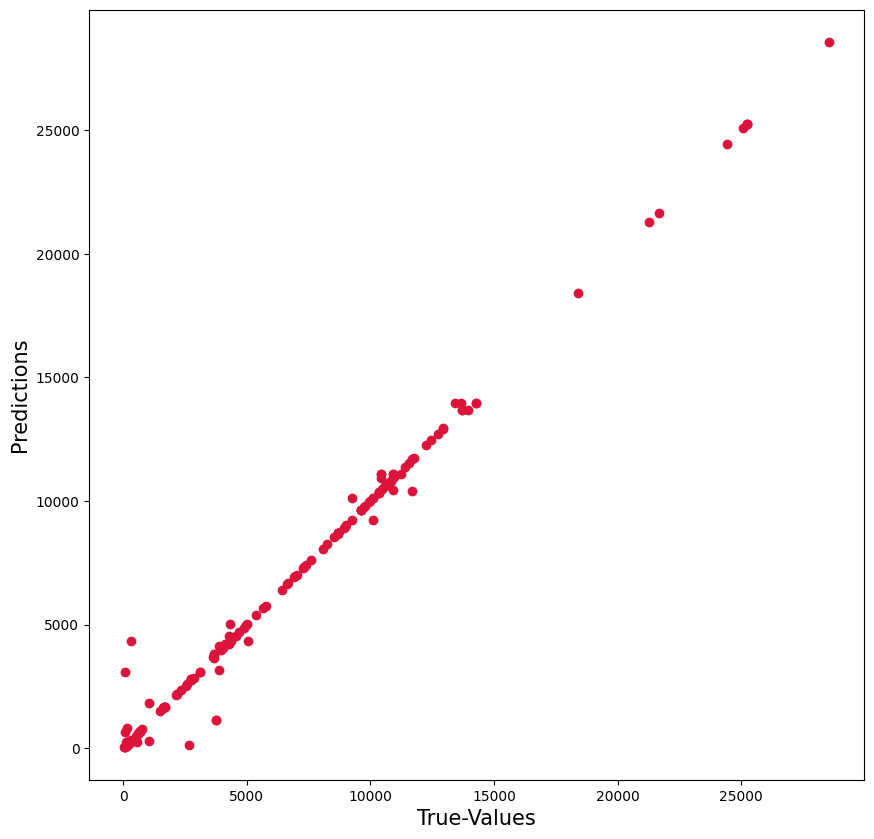

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.xlabel('True-Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))

321434.78267068526


In [40]:
print(mean_squared_error(y_test,y_pred)**0.5)

566.9521872880333


In [42]:
print(mean_absolute_error(y_test, y_pred))

173.42833964497055


In [41]:
print(r2_score(y_test, y_pred))

0.991072181851616
